In [12]:
import pandas as pd
pd.set_option('display.max_columns', None)
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc
import numpy as np
# 한글 폰트 설정
plt.rcParams['font.family'] = 'Malgun Gothic'  # '맑은 고딕'을 사용하는 경우
plt.rcParams['axes.unicode_minus'] = False  # 마이너스 기호 깨짐 방지

In [13]:
df = pd.read_csv('병합데이터.csv')
df = df.drop(columns = 'Unnamed: 0')

df_log = pd.read_csv('log_clean.csv')
df_ex = pd.read_csv('ex_clean.csv')
df_sv = pd.read_csv('sv_clean.csv') 
df_cus = pd.read_csv('cus_clean.csv')

df_log = df_log.drop(columns = 'Unnamed: 0')
df_ex = df_ex.drop(columns = 'Unnamed: 0')
df_sv = df_sv.drop(columns = 'Unnamed: 0')
df_cus = df_cus.drop(columns = 'Unnamed: 0')
df_sv_grouped = df_sv.groupby(['서비스번호', '서비스명', '판매자', '서비스가격', '평점', '대분류'], as_index=False)['판매수'].sum()

In [15]:
value_counts_percentage = df_cus['서비스총구매수'].value_counts(normalize=True) * 100
value_counts_percentage = value_counts_percentage[value_counts_percentage.index < 10]
value_counts_percentage

서비스총구매수
1    51.832811
2    21.551618
3    10.642738
4     5.601326
5     3.219145
6     1.890620
7     1.204907
8     0.771519
9     0.567913
Name: proportion, dtype: float64

In [207]:
df_cus['서비스총구매수'].value_counts(normalize=True) * 100

서비스총구매수
1     51.832811
2     21.551618
3     10.642738
4      5.601326
5      3.219145
        ...    
81     0.000727
85     0.000727
86     0.000727
82     0.000727
55     0.000727
Name: proportion, Length: 90, dtype: float64

In [16]:
value_counts_percentage.loc[value_counts_percentage.index <=5].sum()

92.84763781531547

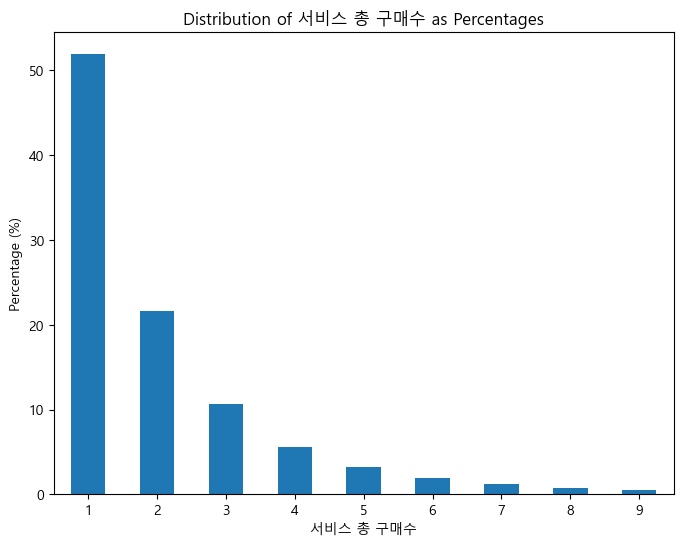

In [17]:
plt.figure(figsize=(8, 6))
value_counts_percentage.sort_index().plot(kind='bar')
plt.xlabel('서비스 총 구매수')
plt.ylabel('Percentage (%)')
plt.title('Distribution of 서비스 총 구매수 as Percentages')
plt.xticks(rotation=0)
plt.show()

In [18]:
df[df['평점']==5]

,거래일자,수수료율,고객ID,프로그램수정횟수,추가결제금액,거래취소여부,거래취소일자,서비스명,판매자,판매금액,서비스가격,평점,이용자수,대분류,서비스번호,사용기기,사용OS,유입경로,회원상태,거주지,연령,성별,서비스총구매수,총구매금액,총수정요청수,총추가결제금액,판매자ID,판매 서비스 수,총 판매 금액,프리미엄 서비스 가입여부,신속 알람 서비스 사용여부,판매수
0,20210201,6.5,5030100140,0.0,9800,0.0,0.0,"카페24,고도몰,메이크샵등 쇼핑몰 수정,코딩,유지보수",logf1,14800.0,5000.0,5.0,584.0,커머스,2102.0,iPhone,iOS11.4.1,유튜브,정상회원,경상도,20.0,남성,8,250400.0,0.0,72400,V2_1008,402,4497380,미가입,미사용,402
1,20210201,6.5,8020105385,0.0,0,0.0,0.0,"카페24,고도몰,메이크샵등 쇼핑몰 수정,코딩,유지보수",logf1,5000.0,5000.0,5.0,584.0,커머스,2102.0,SM-N950N,Android7.1.1,인스타그램,정상회원,경기도,27.0,남성,3,60000.0,0.0,0,V2_1008,402,4497380,미가입,미사용,402
2,20210201,6.5,110104033157,0.0,9200,0.0,0.0,"엑셀 VBA, 매크로, ERP 프로그램 개발해 드립니다.",엑셀의신,19200.0,10000.0,5.0,583.0,데이터,2103.0,iPhone,iOS11.4.1,유튜브,정상회원,경기도,29.0,남성,1,19200.0,0.0,9200,V2_306,1587,25505280,미가입,미사용,1587
3,20210201,7.5,40203001176,0.0,11000,0.0,0.0,"엑셀을 이용 서식과 집계, 분석 및 VBA 프로그래밍",태구리,61000.0,50000.0,5.0,504.0,데이터,2105.0,iPhone,iOS11.0.3,유튜브,정상회원,전라도,20.0,기타,5,645000.0,0.0,55000,V2_197,516,33712920,가입,사용,507
4,20210201,6.5,5041700297,0.0,0,0.0,0.0,"엑셀을 이용 서식과 집계, 분석 및 VBA 프로그래밍",태구리,50000.0,50000.0,5.0,504.0,데이터,2105.0,iPhone,iOS11.4.1,네이버블로그,정상회원,제주도,32.0,남성,6,203000.0,1.0,3000,V2_197,516,33712920,가입,사용,507
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
344266,20210630,6.5,130210020110,2.0,6100,0.0,0.0,반응형 정적 및 동적 웹사이트 개발해 드립니다.,LEANTN,366100.0,360000.0,5.0,4.0,홈페이지,3801.0,SM-G950N,Android8.0.0,유튜브,정상회원,전라도,23.0,남성,2,427200.0,4.0,12200,V2_1076,12,3565400,미가입,미사용,10
344267,20210630,6.5,130301013136,1.0,1600,0.0,0.0,반응형 정적 및 동적 웹사이트 개발해 드립니다.,LEANTN,361600.0,360000.0,5.0,4.0,홈페이지,3801.0,iPhone,iOS12.0,네이버카페,정상회원,경기도,20.0,기타,1,361600.0,1.0,1600,V2_1076,12,3565400,미가입,미사용,10
344268,20210630,7.5,130302041153,1.0,5400,0.0,0.0,반응형 정적 및 동적 웹사이트 개발해 드립니다.,LEANTN,365400.0,360000.0,5.0,4.0,홈페이지,3801.0,iPhone,iOS12.0,유튜브,정상회원,서울시,22.0,남성,1,365400.0,1.0,5400,V2_1076,12,3565400,미가입,미사용,10
344269,20210630,6.5,13030302075,0.0,2800,0.0,0.0,반응형 정적 및 동적 웹사이트 개발해 드립니다.,LEANTN,362800.0,360000.0,5.0,4.0,홈페이지,3801.0,SM-G950N,Android8.0.0,유튜브,정상회원,충청도,30.0,남성,5,488300.0,0.0,13300,V2_1076,12,3565400,미가입,미사용,10


In [19]:
df_cus

,고객ID,사용기기,사용OS,유입경로,회원상태,거주지,연령,성별,서비스총구매수,총구매금액,총수정요청수,총추가결제금액
0,1001010041,iPhone,iOS11.4.1,유튜브,정상회원,경기도,25.0,남성,1,44500.0,0.0,14500
1,10010100410,SM-N935S,Android7.0,검색광고,정상회원,경기도,26.0,기타,1,44500.0,0.0,14500
2,100101004108,iPhone,iOS12.0,네이버블로그,정상회원,경기도,23.0,남성,1,34500.0,0.0,14500
3,100101004109,iPhone,iOS11.4.1,인스타그램,정상회원,경기도,20.0,남성,1,364500.0,0.0,14500
4,100101004112,iPhone,iOS11.4.1,직접검색,정상회원,경기도,28.0,남성,1,34500.0,0.0,14500
...,...,...,...,...,...,...,...,...,...,...,...,...
137516,9050206990,SM-N950N,Android8.0.0,유튜브,정상회원,경상도,21.0,남성,2,75000.0,0.0,20000
137517,9050206992,iPhone,iOS11.4,네이버카페,탈퇴,강원도,26.0,기타,1,310000.0,0.0,10000
137518,9050206995,iPhone,iOS12.0,인스타그램,정상회원,강원도,28.0,남성,1,89000.0,0.0,10000
137519,9050206996,SM-G930S,Android8.0.0,네이버블로그,정상회원,강원도,43.0,남성,1,9000.0,1.0,4000


In [20]:
df_cus['서비스총구매수'].value_counts()

서비스총구매수
1     71281
2     29638
3     14636
4      7703
5      4427
      ...  
81        1
85        1
86        1
82        1
55        1
Name: count, Length: 90, dtype: int64

In [21]:
df_log['평점'].value_counts()

평점
5.0    281710
4.9     31964
0.0      9175
4.8      7142
4.7      6422
4.6      2686
4.0      2027
4.5      1635
4.3       392
4.4       387
4.2       381
3.4       117
2.8        61
3.5        57
3.9        39
3.3        36
3.0        12
3.7        11
1.0        10
2.3         8
3.6         5
Name: count, dtype: int64

In [177]:
df_commerce = df[df['대분류']=='커머스'].reset_index(drop= True)
df_commerce = df_commerce[df_commerce['거래취소여부']==0]
df_commerce["추가금액여부"] = df_commerce["추가결제금액"].where(df_commerce["추가결제금액"] > 0, 0).apply(lambda x: 1 if x > 0 else 0)
df_commerce['연령'] = df_commerce['연령'].replace('기타', np.nan)
df_commerce['연령'] = df_commerce['연령'].astype(float)
mean_age = df_commerce['연령'].astype(float).mean()
df_commerce['연령'] = df_commerce['연령'].fillna(mean_age)
df_commerce['연령대'] = (df_commerce['연령'] // 10 * 10).astype(int) 
df_commerce = df_commerce[['서비스번호','프로그램수정횟수','판매금액','서비스가격','평점','이용자수','거주지','유입경로','성별','추가금액여부','연령대']]

df_commerce

,서비스번호,프로그램수정횟수,판매금액,서비스가격,평점,이용자수,거주지,유입경로,성별,추가금액여부,연령대
0,2102.0,0.0,14800.0,5000.0,5.0,584.0,경상도,유튜브,남성,1,20
1,2102.0,0.0,5000.0,5000.0,5.0,584.0,경기도,인스타그램,남성,0,20
2,2106.0,1.0,15000.0,5000.0,5.0,483.0,경기도,검색광고,남성,1,20
3,2106.0,0.0,5000.0,5000.0,5.0,483.0,경상도,유튜브,남성,0,30
4,2106.0,0.0,5000.0,5000.0,5.0,483.0,제주도,검색광고,남성,0,40
...,...,...,...,...,...,...,...,...,...,...,...
26797,2359.0,0.0,20000.0,20000.0,5.0,65.0,경기도,네이버블로그,여성,0,20
26798,2359.0,0.0,22100.0,20000.0,5.0,65.0,경기도,유튜브,남성,1,20
26799,2359.0,0.0,20000.0,20000.0,5.0,65.0,경기도,유튜브,여성,0,20
26800,2359.0,0.0,20000.0,20000.0,5.0,65.0,전라도,네이버블로그,기타,0,20


In [179]:
from sklearn.preprocessing import LabelEncoder
'''
# 라벨 인코더 생성 및 라벨링
label_encoder = LabelEncoder()
df_commerce["유입경로"] = label_encoder.fit_transform(df_commerce["유입경로"])
df_commerce["성별"] = label_encoder.fit_transform(df_commerce["성별"])
df_commerce["거주지"] = label_encoder.fit_transform(df_commerce["거주지"])
df_commerce
'''

# 열별로 LabelEncoder 생성
label_encoder_유입경로 = LabelEncoder()
label_encoder_성별 = LabelEncoder()
label_encoder_거주지 = LabelEncoder()

# 인코딩
df_commerce["유입경로"] = label_encoder_유입경로.fit_transform(df_commerce["유입경로"])
df_commerce["성별"] = label_encoder_성별.fit_transform(df_commerce["성별"])
df_commerce["거주지"] = label_encoder_거주지.fit_transform(df_commerce["거주지"])

# 원래 값으로 복원
df_commerce["유입경로_"] = label_encoder_유입경로.inverse_transform(df_commerce["유입경로"])
df_commerce["성별_"] = label_encoder_성별.inverse_transform(df_commerce["성별"])
df_commerce["거주지_"] = label_encoder_거주지.inverse_transform(df_commerce["거주지"])


In [182]:
# KNN 코사인유사도

In [184]:

feature_cols = ["프로그램수정횟수", "판매금액", "유입경로", "성별",'거주지','연령대']
features = df_commerce[feature_cols].values

In [190]:
from sklearn.neighbors import NearestNeighbors
from sklearn.preprocessing import StandardScaler
import numpy as np

# 표준화 객체 생성 및 데이터에 적용
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)  # 기존 데이터 표준화

# '판매금액'에 가중치 적용 (가중치 2배 예시)
weight_factors = np.ones(scaled_features.shape[1])
weight_factors[feature_cols.index('판매금액')] = 2  # '판매금액'의 인덱스 위치에 2배 가중치 적용

# 표준화된 데이터에 가중치 적용
weighted_scaled_features = scaled_features * weight_factors

# 표준화된 데이터를 사용하여 KNN 모델 학습
knn = NearestNeighbors(n_neighbors=5, metric="euclidean")
knn.fit(weighted_scaled_features)

# 새 고객 데이터 표준화 및 가중치 적용
new_customer = {
    "프로그램수정횟수": 1,
    "판매금액": 12000,
    "유입경로": 1,
    "성별": 2,
    '거주지': 2,
    '연령대': 20
}
new_customer_data = [new_customer[col] for col in feature_cols]  # 배열로 정리
scaled_new_customer_data = scaler.transform([new_customer_data])  # 새 데이터도 표준화
weighted_scaled_new_customer_data = scaled_new_customer_data * weight_factors  # 가중치 적용

# 표준화된 새 고객 데이터와 유사한 기존 고객 찾기
distances, indices = knn.kneighbors(weighted_scaled_new_customer_data)

# 유사한 기존 상품
dc = df_commerce.iloc[indices.flatten()].drop(columns = ['거주지','유입경로','성별'])
dc

,서비스번호,프로그램수정횟수,판매금액,서비스가격,평점,이용자수,추가금액여부,연령대,유입경로_,성별_,거주지_
15852,2274.0,1.0,11800.0,5000.0,5.0,92.0,1,20,구글광고,여성,경상도
16167,2384.0,1.0,11000.0,11000.0,5.0,61.0,0,20,검색광고,여성,경상도
13552,4649.0,1.0,8800.0,5000.0,5.0,2.0,1,20,검색광고,여성,경상도
4084,2422.0,1.0,7600.0,5000.0,5.0,52.0,1,20,검색광고,여성,경상도
16575,3288.0,1.0,18000.0,10000.0,5.0,10.0,1,20,검색광고,여성,경상도


In [192]:
qwer = df_sv_grouped.loc[df_sv_grouped['서비스번호'].isin(df_commerce['서비스번호'].iloc[indices.flatten()]),['서비스명','서비스번호']]
pd.merge(dc,qwer, on= '서비스번호',how='inner')

,서비스번호,프로그램수정횟수,판매금액,서비스가격,평점,이용자수,추가금액여부,연령대,유입경로_,성별_,거주지_,서비스명
0,2274.0,1.0,11800.0,5000.0,5.0,92.0,1,20,구글광고,여성,경상도,"워드프레스 쇼핑몰, 홈페이지 유지보수해 드립니다."
1,2384.0,1.0,11000.0,11000.0,5.0,61.0,0,20,검색광고,여성,경상도,"카페24, 고도몰, 영카트 등 쇼핑몰 수정 및 개선 해 드립니다."
2,4649.0,1.0,8800.0,5000.0,5.0,2.0,1,20,검색광고,여성,경상도,"카페24,고도몰,메이크샵,모든쇼핑몰 수정,오류,문제해결"
3,2422.0,1.0,7600.0,5000.0,5.0,52.0,1,20,검색광고,여성,경상도,카페24 쇼핑몰 수정 및 추가작업 해 드립니다.
4,3288.0,1.0,18000.0,10000.0,5.0,10.0,1,20,검색광고,여성,경상도,카페24쇼핑몰 UIUX 수정해 드립니다.


# 임베딩으로 상품 추천

In [195]:
#!pip install sentence-transformers

In [197]:
# 필요한 라이브러리 임포트
import pandas as pd
from sklearn.metrics.pairwise import cosine_similarity
from sentence_transformers import SentenceTransformer

In [199]:
df_sv_commerce = df_sv_grouped.loc[df_sv_grouped['대분류']=='커머스'].reset_index(drop=True)

sv_name = df_sv_commerce.loc[df_sv_commerce['서비스번호']==2274.0,'서비스명'].values
sv_name[0]

'워드프레스 쇼핑몰, 홈페이지 유지보수해 드립니다.'

In [201]:
# 특정 서비스에 대한 추천 예시
# Sentence-BERT 모델 로드 (다국어 모델)
model = SentenceTransformer('sentence-transformers/paraphrase-multilingual-MiniLM-L12-v2')

# 서비스명 임베딩
embeddings = model.encode(df_sv_commerce['서비스명'].tolist())

# 코사인 유사도 계산
cosine_sim = cosine_similarity(embeddings)

# 추천 함수 정의
def recommend_services(service_name, df, similarity_matrix, top_n=5):
    if service_name not in df['서비스명'].values:
        return "해당 서비스가 목록에 없습니다."
    
    # 선택한 서비스의 인덱스
    idx = df[df['서비스명'] == service_name].index[0]
    
    # 코사인 유사도 기준으로 유사한 서비스 추출
    sim_scores = list(enumerate(similarity_matrix[idx]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    
    # 상위 n개의 유사한 서비스 선택 (자기 자신 제외)
    sim_scores = sim_scores[1:top_n+1]
    
    # 결과 출력
    similar_services = [(df['서비스번호'].iloc[i], df['서비스명'].iloc[i], score) for i, score in sim_scores]
    return similar_services


recommendation = recommend_services(sv_name[0], df_sv_commerce, cosine_sim, top_n=5)
print("추천 결과:", recommendation)

C:\Users\campus4D050\anaconda3\Lib\site-packages\huggingface_hub\file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


추천 결과: [(6485.0, '고객을 사로 잡는 워드프레스 쇼핑몰을 제작해 드립니다.', 0.8810251), (3186.0, '홈페이지쇼핑몰 유지보수 및 수정 드립니다.', 0.8594117), (4986.0, '쇼핑몰 홈페이지 제작해 드립니다.', 0.8548118), (5045.0, '워드프레스 홈페이지,쇼핑몰,예약시스템 제작해 드립니다.', 0.8205452), (4138.0, '쇼핑몰의 유지보수와 기타 페이지를 제작해 드립니다.', 0.814553)]


In [225]:
zz = pd.DataFrame(df_log.groupby('서비스번호')['판매금액'].mean()).reset_index()
zz

,서비스번호,판매금액
0,2102.0,8046.119403
1,2103.0,12878.147448
2,2105.0,53233.057199
3,2106.0,9244.624374
4,2107.0,8946.067511
...,...,...
2858,6488.0,850000.000000
2859,6489.0,551628.571429
2860,6494.0,385433.333333
2861,6495.0,34500.000000


In [239]:
dr = pd.DataFrame(recommendation,columns = ['서비스번호','서비스명','유사도'])
x = pd.merge(dr,zz,on='서비스번호',how='inner')

x.rename(columns = {'판매금액':'평균판매금액'},inplace = True)
x

,서비스번호,서비스명,유사도,평균판매금액
0,6485.0,고객을 사로 잡는 워드프레스 쇼핑몰을 제작해 드립니다.,0.881025,1.201680e+06
1,3186.0,홈페이지쇼핑몰 유지보수 및 수정 드립니다.,0.859412,1.006434e+04
2,4986.0,쇼핑몰 홈페이지 제작해 드립니다.,0.854812,1.351300e+06
3,5045.0,"워드프레스 홈페이지,쇼핑몰,예약시스템 제작해 드립니다.",0.820545,1.508200e+06
4,4138.0,쇼핑몰의 유지보수와 기타 페이지를 제작해 드립니다.,0.814553,8.633333e+03


In [241]:
pd.set_option('display.float_format', '{:.2f}'.format)
x

,서비스번호,서비스명,유사도,평균판매금액
0,6485.00,고객을 사로 잡는 워드프레스 쇼핑몰을 제작해 드립니다.,0.88,1201680.00
1,3186.00,홈페이지쇼핑몰 유지보수 및 수정 드립니다.,0.86,10064.34
2,4986.00,쇼핑몰 홈페이지 제작해 드립니다.,0.85,1351300.00
3,5045.00,"워드프레스 홈페이지,쇼핑몰,예약시스템 제작해 드립니다.",0.82,1508200.00
4,4138.00,쇼핑몰의 유지보수와 기타 페이지를 제작해 드립니다.,0.81,8633.33


In [245]:
df_log[df_log['서비스번호']==6485][]

,거래일자,수수료율,고객ID,프로그램수정횟수,추가결제금액,거래취소여부,거래취소일자,서비스명,판매자,판매금액,서비스가격,평점,이용자수,대분류,서비스번호
343110,20210630,6.50,50508001152,0.00,0,0.00,0.00,고객을 사로 잡는 워드프레스 쇼핑몰을 제작해 드립니다.,웹핏,1200000.00,1200000.00,0.00,0.00,커머스,6485.00
343111,20210630,9.00,6030202293,1.00,8400,0.00,0.00,고객을 사로 잡는 워드프레스 쇼핑몰을 제작해 드립니다.,웹핏,1208400.00,1200000.00,0.00,0.00,커머스,6485.00
343112,20210630,6.50,6040300730,0.00,0,0.00,0.00,고객을 사로 잡는 워드프레스 쇼핑몰을 제작해 드립니다.,웹핏,1200000.00,1200000.00,0.00,0.00,커머스,6485.00
343113,20210630,7.50,6040300822,0.00,0,0.00,0.00,고객을 사로 잡는 워드프레스 쇼핑몰을 제작해 드립니다.,웹핏,1200000.00,1200000.00,0.00,0.00,커머스,6485.00
343114,20210630,6.50,100305011163,0.00,0,0.00,0.00,고객을 사로 잡는 워드프레스 쇼핑몰을 제작해 드립니다.,웹핏,1200000.00,1200000.00,0.00,0.00,커머스,6485.00
